In [4]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(1, 'dnn/')

# del bnn
import bcell_nn as bnn
import bcell_plot
import bcell_preprocess as bpreprocess
# import bcell_driver

# System arguments
import argparse
# data management
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# flow cytometry libraries
import cytoflow as flow
# user defined functions

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

ImportError: No module named 'tensorflow'

In [11]:
paths = [
    '../models/signalling_naive0',
    '../models/signalling_specific0',
    '../models/surface_naive0',
    '../models/surface_specific0'
]

In [12]:
models = []
histories = []

### 
# signal naive
# signal specific
# surface naive
# surface specific

for p in paths:
    models.append(keras.models.load_model(p))
    histories.append(np.load(p + '.npy', allow_pickle=True).item())

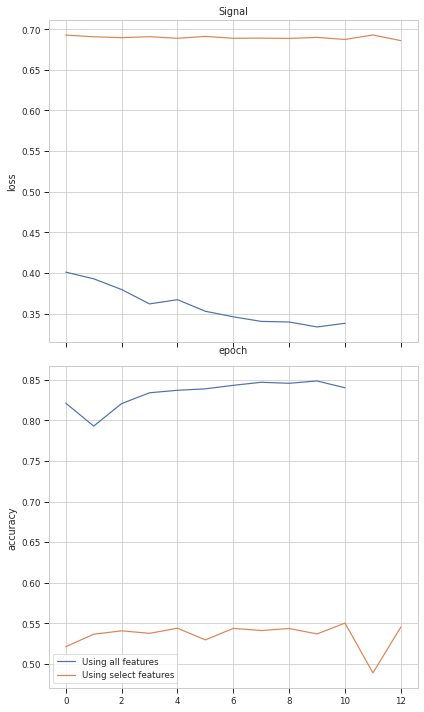

In [28]:
# plot signalling
v1 = histories[0]['val_loss']
v2 = histories[1]['val_loss']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,10), sharex=True)
ax1.plot(v1, label='Using all features')
ax1.plot(v2, label='Using select features')
ax1.set_ylabel('loss')

# plot acc
v1 = histories[0]['val_accuracy']
v2 = histories[1]['val_accuracy']

ax2.plot(v1, label='Using all features')
ax2.plot(v2, label='Using select features')
ax2.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.set_title('Signal')

plt.legend()
plt.tight_layout()

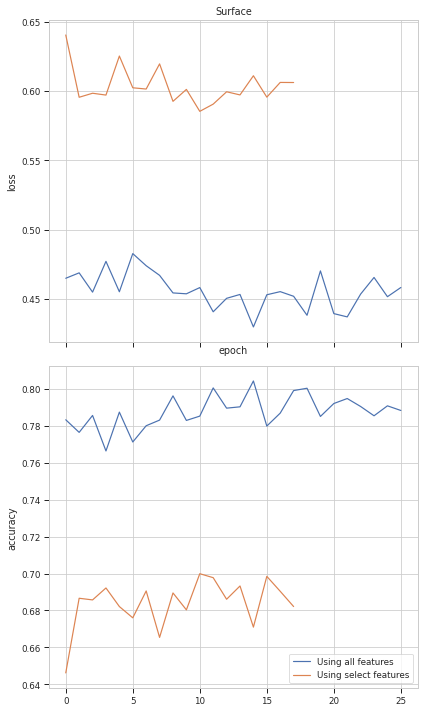

In [29]:
# plot signalling
v1 = histories[2]['val_loss']
v2 = histories[3]['val_loss']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,10), sharex=True)
ax1.plot(v1, label='Using all features')
ax1.plot(v2, label='Using select features')
ax1.set_ylabel('loss')

# plot acc
v1 = histories[2]['val_accuracy']
v2 = histories[3]['val_accuracy']

ax2.plot(v1, label='Using all features')
ax2.plot(v2, label='Using select features')
ax2.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.set_title('Surface')

plt.legend()
plt.tight_layout()

# Visualize hypertuning

Text(0, 0.5, 'loss')

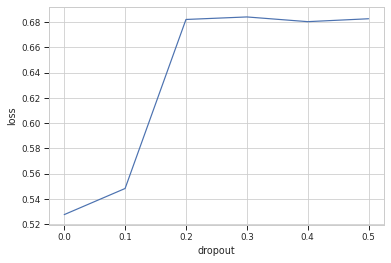

In [32]:
losses = np.array([0.52756667, 0.54826667, 0.68216667, 0.68416667, 0.68043333,
       0.68273333])
dropouts = np.linspace(0.0, 0.5, 6)

plt.plot(dropouts, losses)
plt.xlabel('dropout')
plt.ylabel('loss')

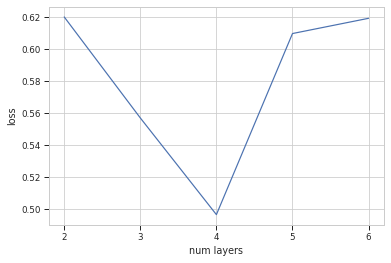

In [37]:
from matplotlib.ticker import MaxNLocator

losses = [0.6201181014378866,
 0.556937058766683,
 0.4964560866355896,
 0.6097364525000254,
 0.6192682484785715]

num_layers = np.arange(2, 7)

plt.plot(num_layers, losses)
plt.xlabel('num layers')
plt.ylabel('loss')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

## pca

In [14]:
pca = np.arange(5,26,5)
losses = [0.6835238337516785,
 0.6302804946899414,
 0.6609857479731241,
 0.5566580494244894,
 0.5430114964644114]

acc = [0.5696007609367371,
 0.6315536300341288,
 0.5906685789426168,
 0.7184223135312399,
 0.7027417023976644]

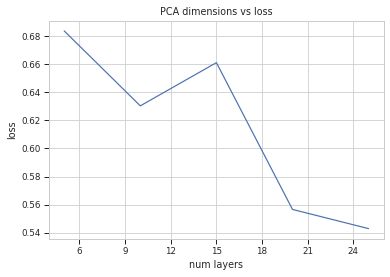

In [18]:
from matplotlib.ticker import MaxNLocator


plt.plot(pca, losses)
plt.xlabel('num layers')
plt.ylabel('loss')
plt.title('PCA dimensions vs loss')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# view model outputs

## wishbone-naive vs transfer

In [40]:
# named wishbone surface 2 by accident
naive = np.load('../models/naive_final1.npy', allow_pickle=True).item()
transfer = np.load('../models/transfer_final2.npy', allow_pickle=True).item()

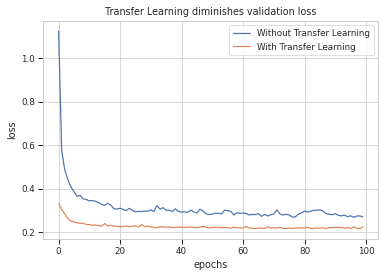

In [45]:
plt.plot(naive['val_loss'], label='Without Transfer Learning')
plt.plot(transfer['val_loss'], label='With Transfer Learning')
plt.title('Transfer Learning diminishes validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

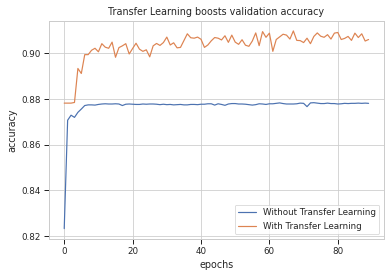

In [46]:
plt.plot(naive['val_acc'][:-10], label='Without Transfer Learning')
plt.plot(transfer['val_acc'][:-10], label='With Transfer Learning')
plt.title('Transfer Learning boosts validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

### surface vs signal

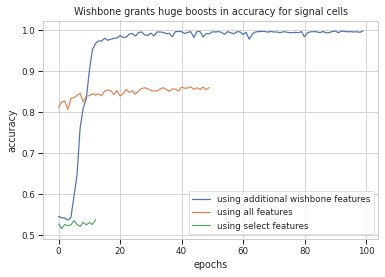

In [61]:
signal_wishbone = np.load('../models/wishbone_signal2.npy', allow_pickle=True).item()
signal_naive = np.load('../models/signalling_naive1.npy', allow_pickle=True).item()
signal_specific = np.load('../models/signalling_specific1.npy', allow_pickle=True).item()

plt.plot(signal_wishbone['val_acc'], label='using additional wishbone features')
plt.plot(signal_naive['val_accuracy'], label='using all features')
plt.plot(signal_specific['val_accuracy'], label='using select features')

plt.title('Wishbone grants huge boosts in accuracy for signal cells')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

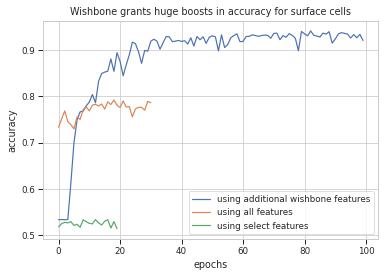

In [60]:
surface_wishbone = np.load('../models/wishbone_surface2.npy', allow_pickle=True).item()
surface_naive = np.load('../models/surface_naive1.npy', allow_pickle=True).item()
surface_specific = np.load('../models/surface_specific1.npy', allow_pickle=True).item()

plt.plot(surface_wishbone['val_acc'], label='using additional wishbone features')
plt.plot(surface_naive['val_accuracy'], label='using all features')
plt.plot(surface_specific['val_accuracy'], label='using select features')

plt.title('Wishbone grants huge boosts in accuracy for surface cells')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# named wishbone surface 2 by accident
naive = np.load('../models/naive_final1.npy', allow_pickle=True).item()
naive_no_wishbone = np.load('../models/naive_no_wishbone_final0.npy', allow_pickle=True).item()
naive_no_wishbone_pca = np.load('../models/naive_no_wishbone_pca_final1.npy', allow_pickle=True).item()

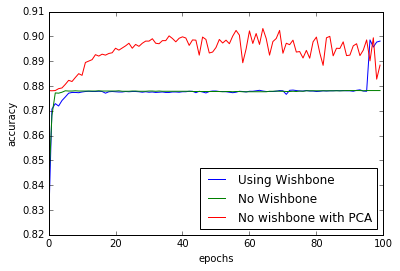

In [10]:
plt.plot(naive['val_acc'], label='Using Wishbone')
plt.plot(naive_no_wishbone['val_acc'], label='No Wishbone')
plt.plot(naive_no_wishbone_pca['val_acc'], label='No wishbone with PCA')

# plt.title('Using Wishbone slightly decreases validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc=4)